In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import yaml

with open('../config.yml') as f:
    config = yaml.safe_load(f)
    
DATA_PATH = config['paths']['raw_data']
PLOT_DIR = config['paths']['plots']
plt.style.use(config['eda']['style'])
os.makedirs(PLOT_DIR, exist_ok=True)

df = pd.read_csv(DATA_PATH)
print("Dataset shape:", df.shape)

Dataset shape: (395, 31)


In [2]:
# 1. Basic Inspection
# Data types and missing values
print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nDuplicates:", df.duplicated().sum())


Data types:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

Missing values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
n

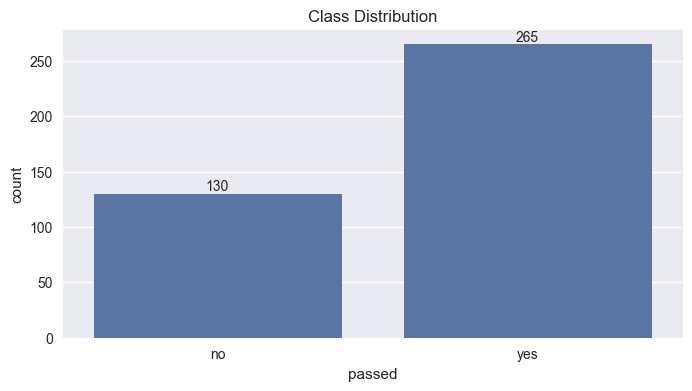

In [3]:
# 2. Target Variable Analysis
# Class distribution
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='passed', data=df, order=['no', 'yes'])
plt.title('Class Distribution')
ax.bar_label(ax.containers[0])
plt.savefig(f"{PLOT_DIR}target_dist.png", bbox_inches='tight', dpi=300)
plt.show()

Numerical features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.00

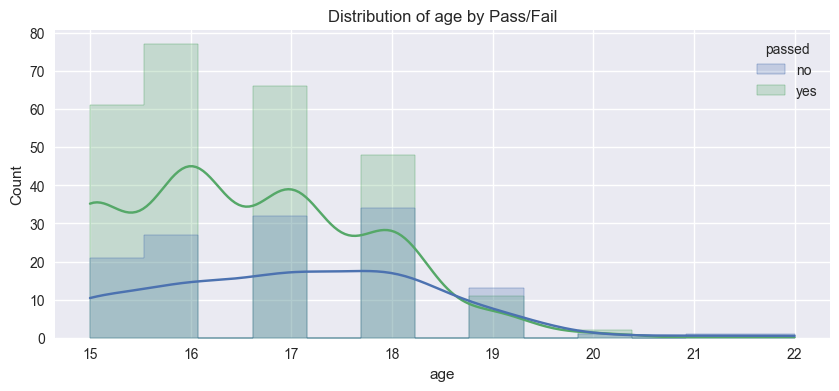

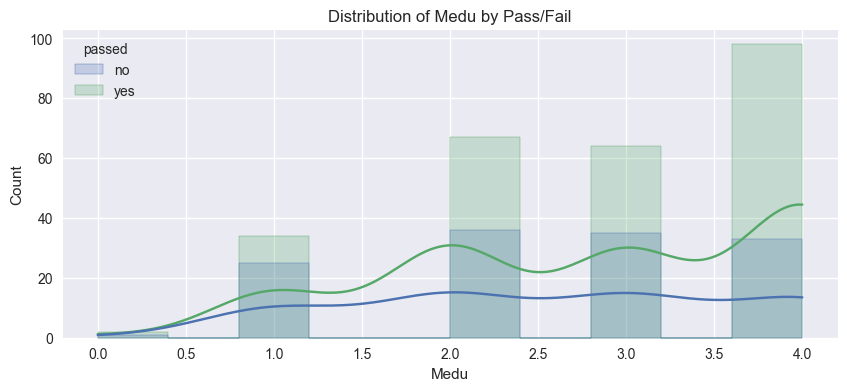

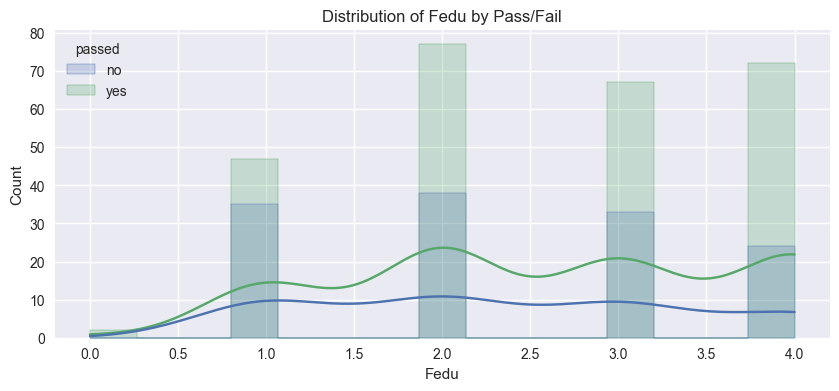

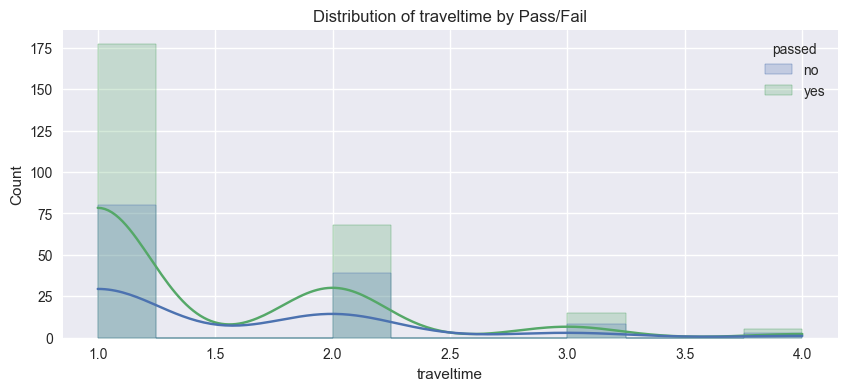

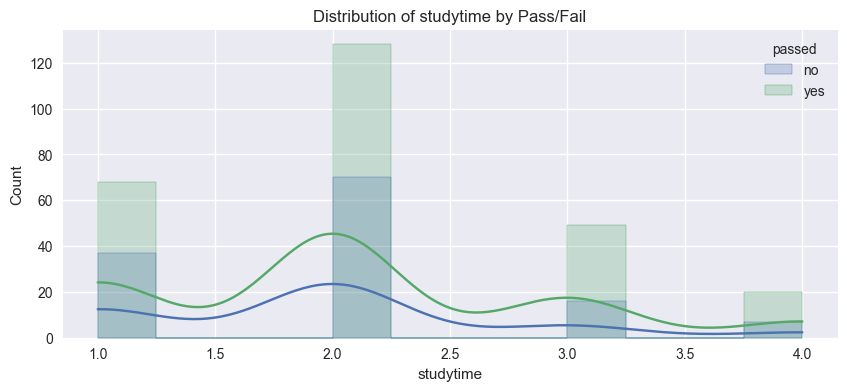

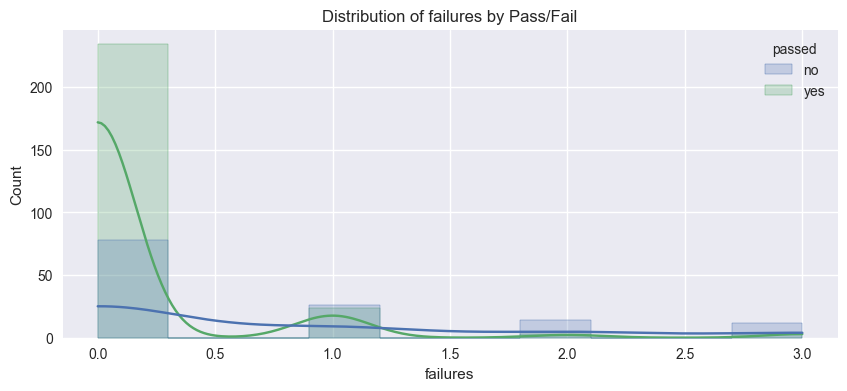

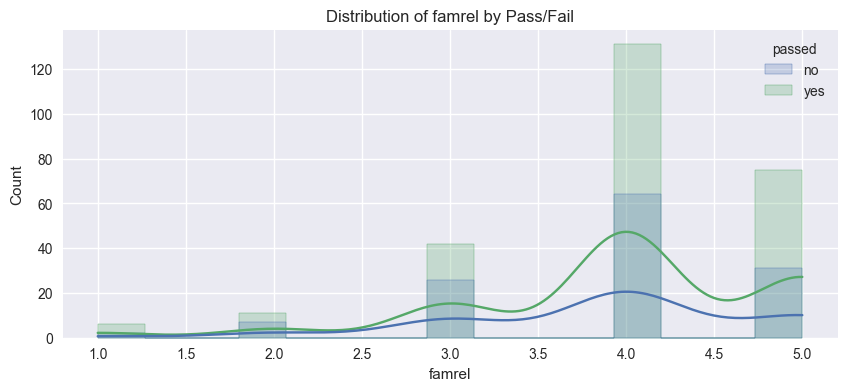

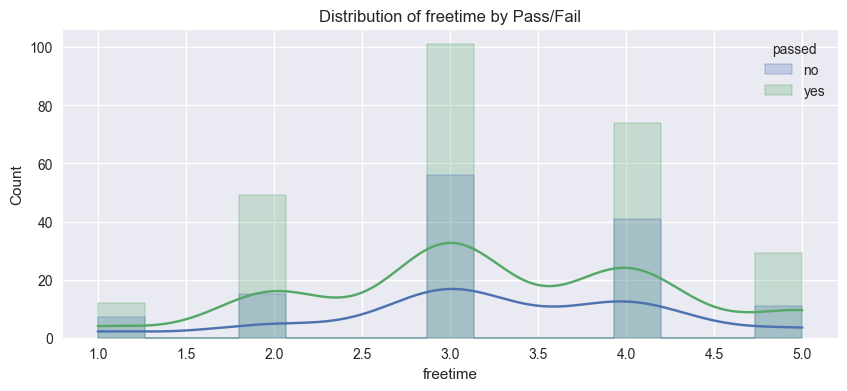

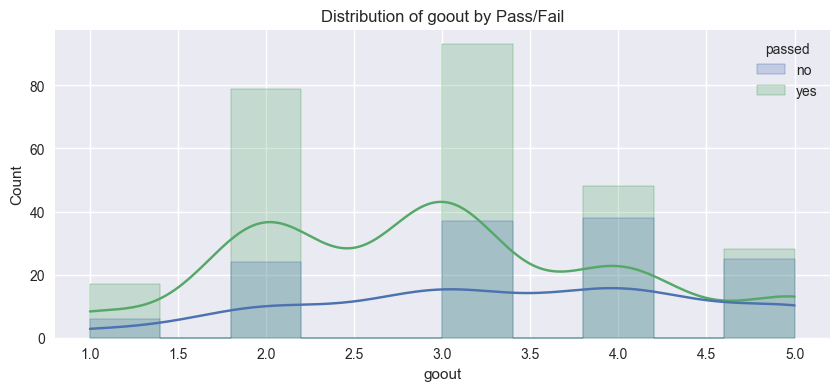

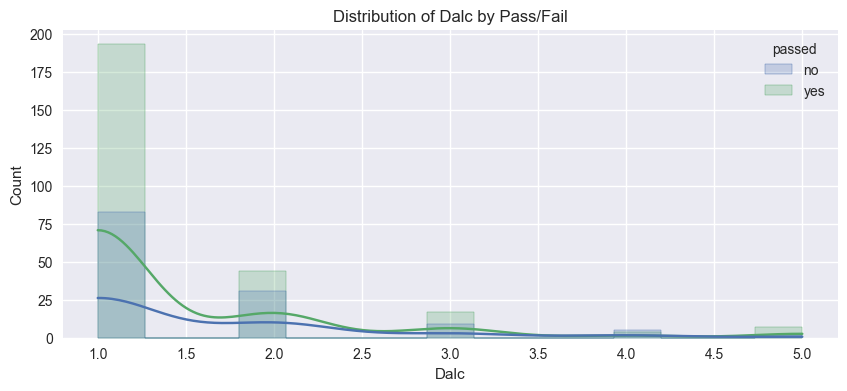

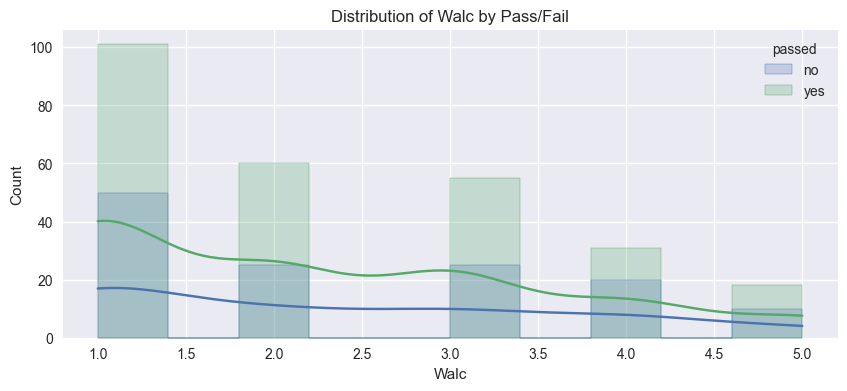

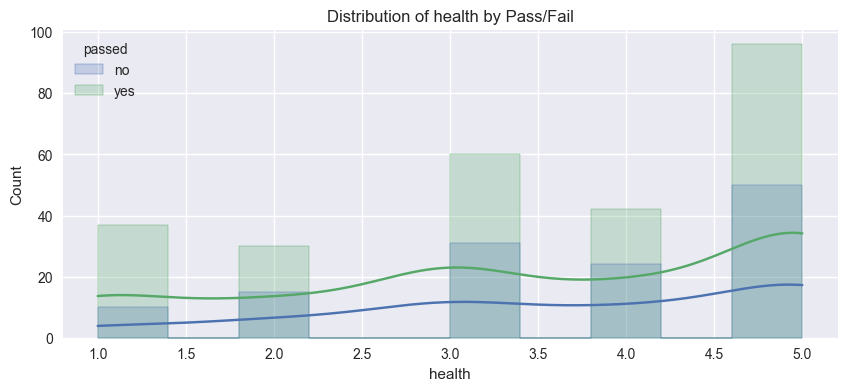

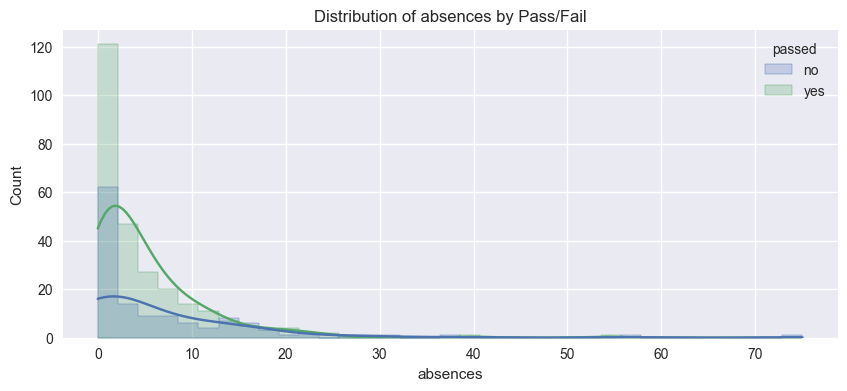

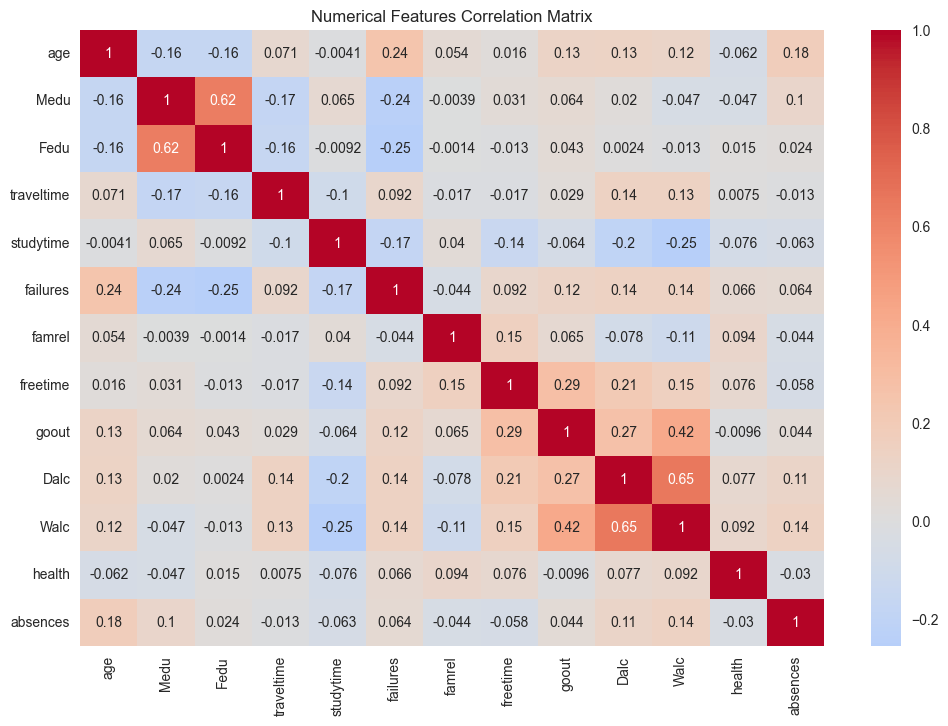

In [4]:
# 3. Numerical Features Analysis
# Select numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical features:", numeric_cols.tolist())

# Descriptive statistics
print(df[numeric_cols].describe())

# Distribution plots
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=col, hue='passed', kde=True, element='step')
    plt.title(f'Distribution of {col} by Pass/Fail')
    plt.savefig(f"{PLOT_DIR}{col}_dist.png", bbox_inches='tight')
    plt.show()

# Correlation analysis
plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Numerical Features Correlation Matrix')
plt.savefig(f"{PLOT_DIR}correlation_matrix.png", bbox_inches='tight')
plt.show()

Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


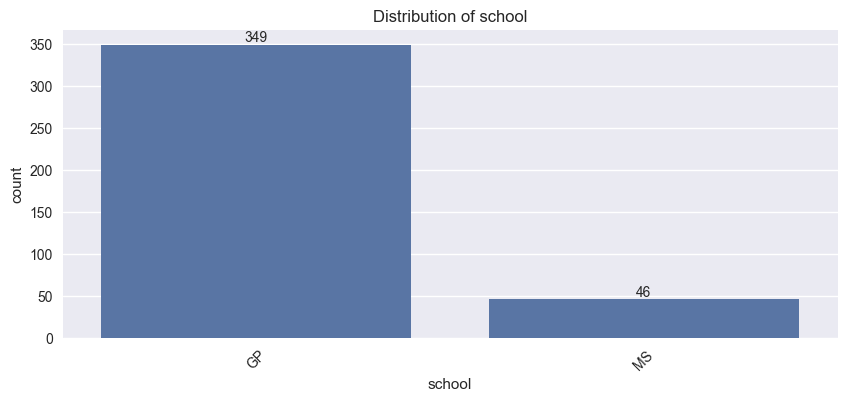

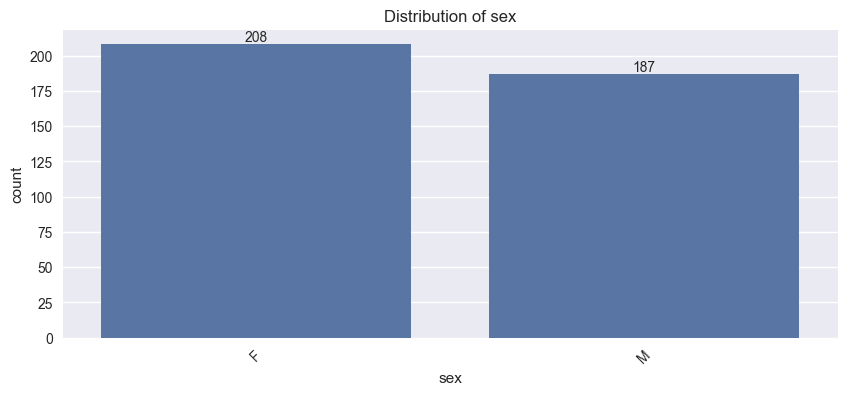

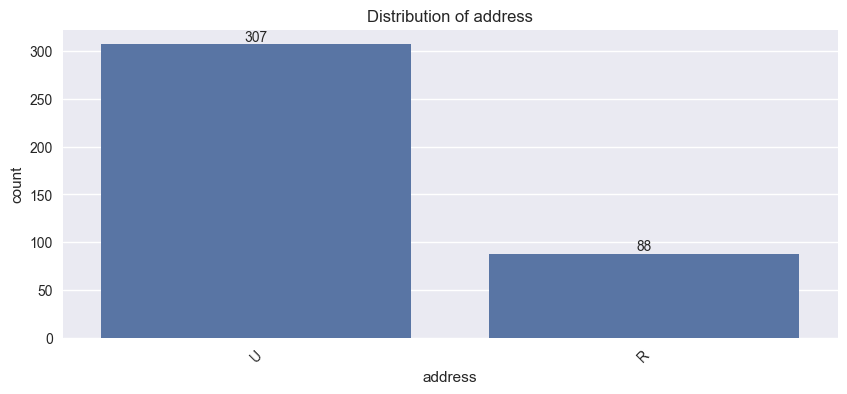

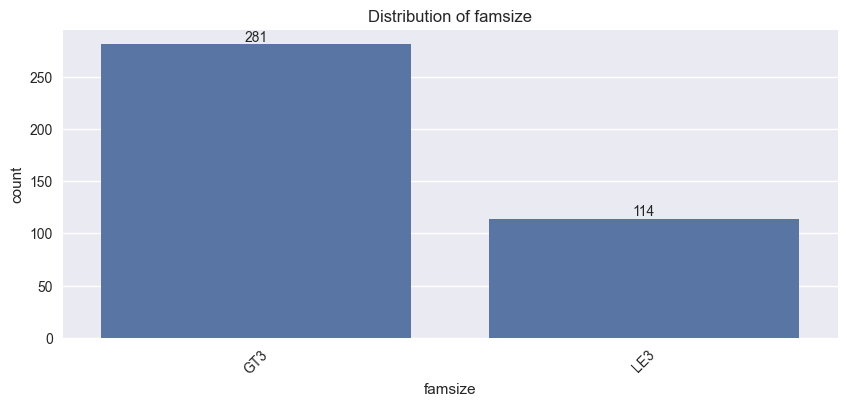

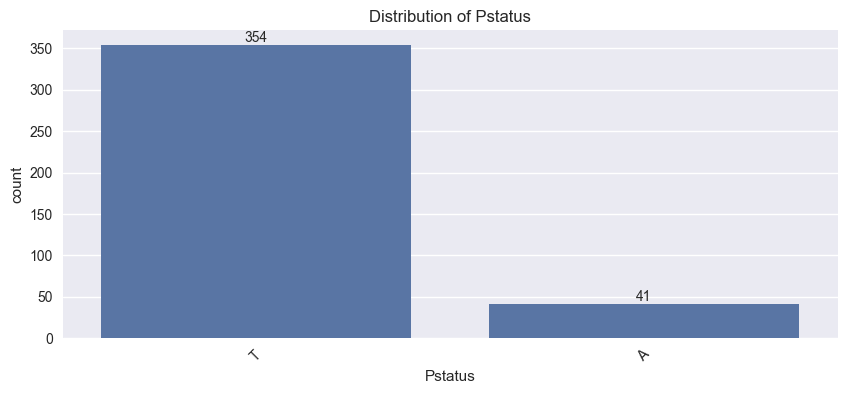

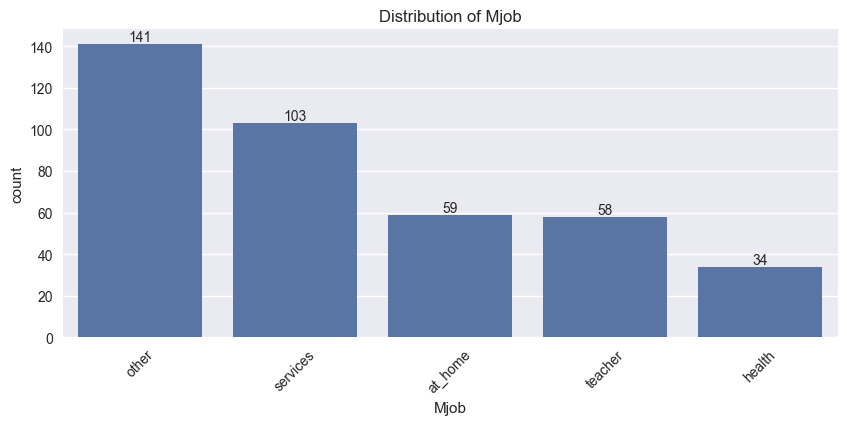

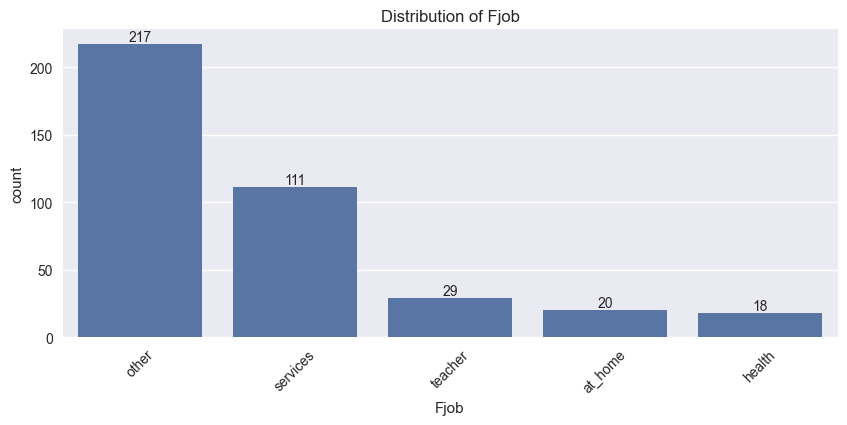

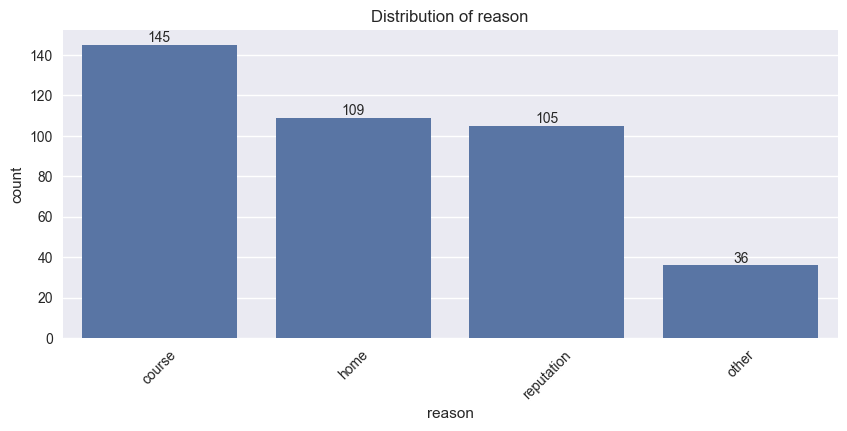

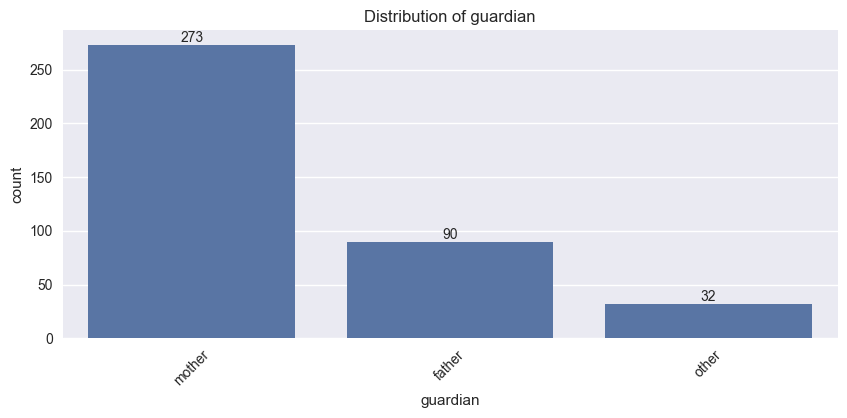

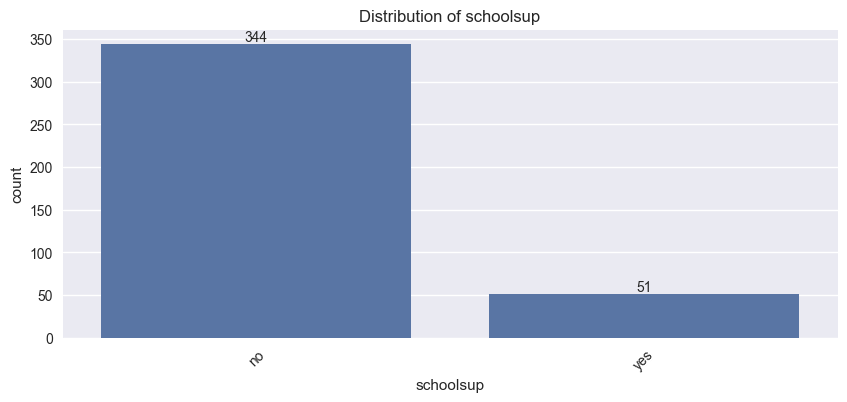

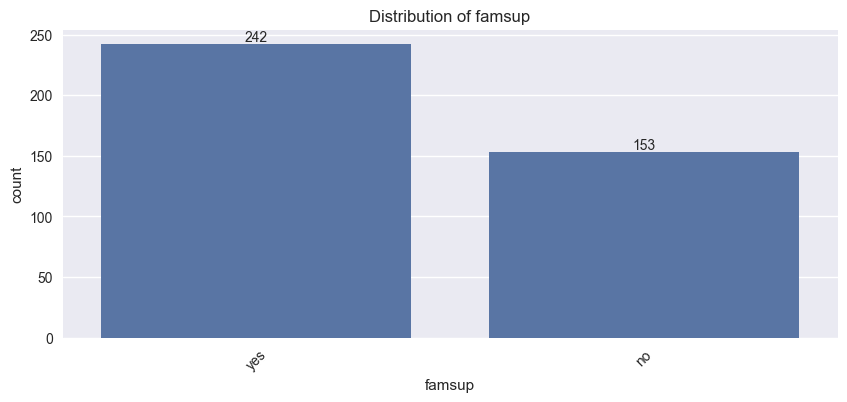

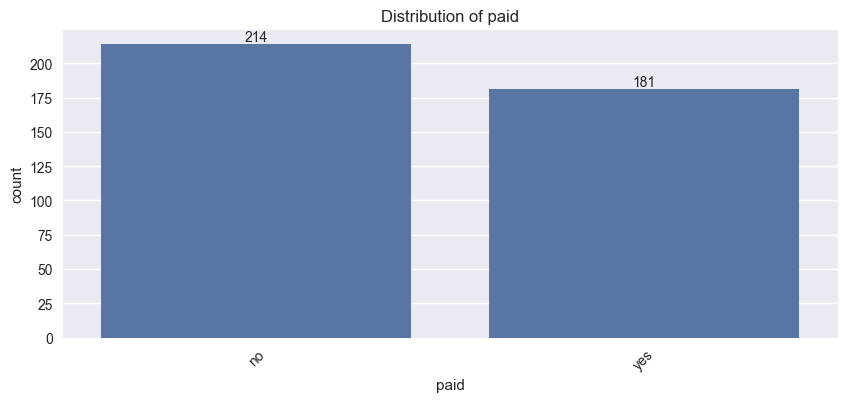

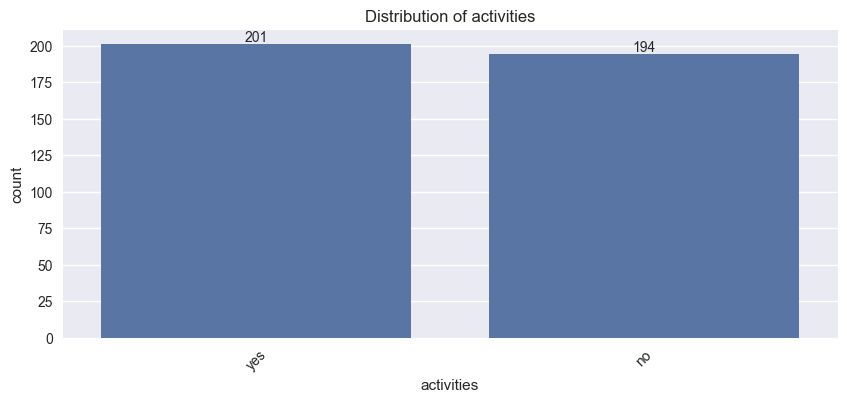

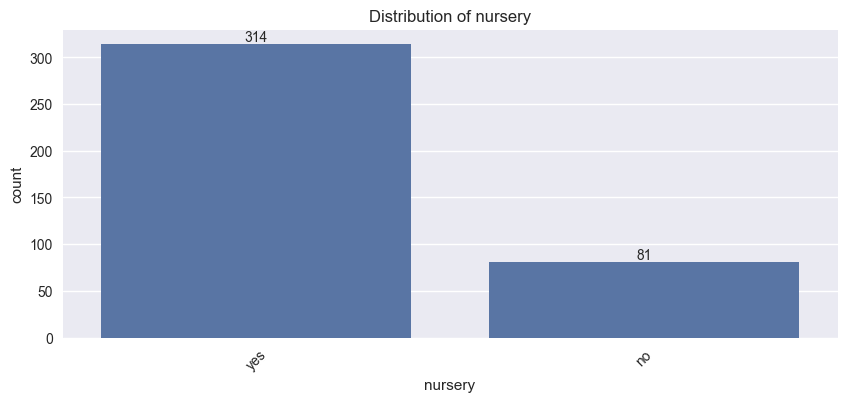

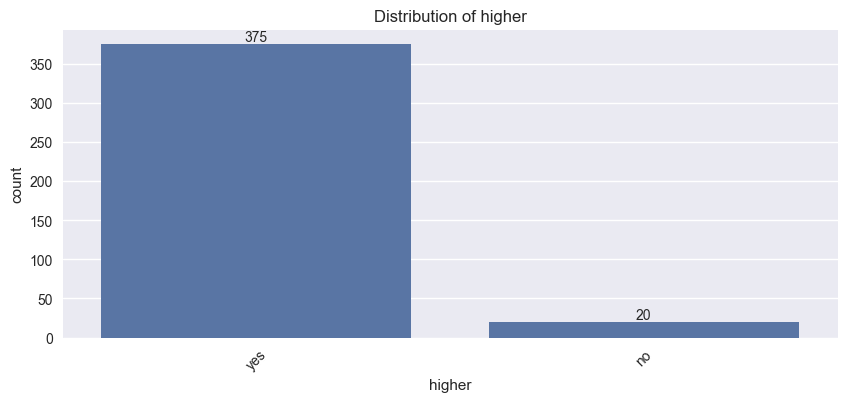

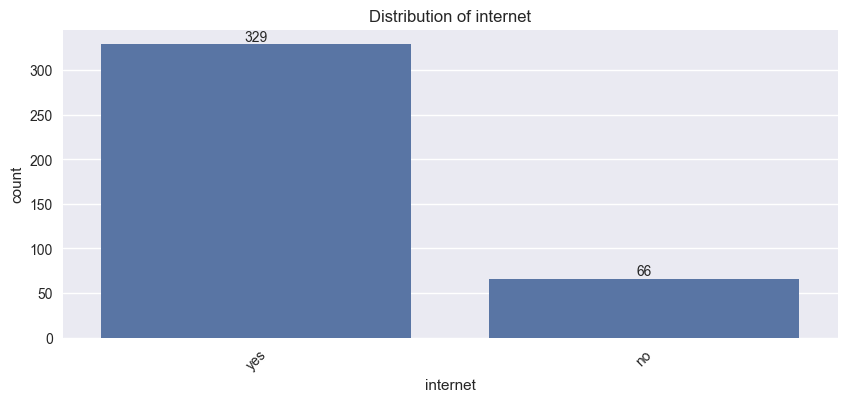

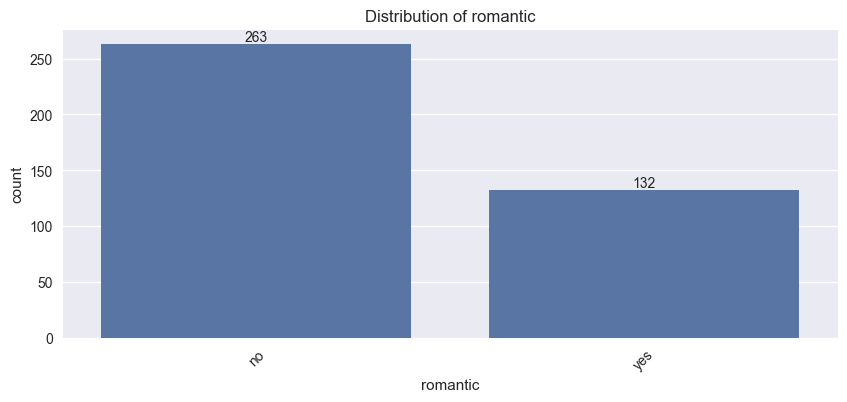

In [5]:
# 4. Categorical Features Analysis
# Select categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.drop('passed')
print("Categorical features:", categorical_cols.tolist())

# Frequency analysis
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    order = df[col].value_counts().index
    ax = sns.countplot(x=col, data=df, order=order)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    ax.bar_label(ax.containers[0])
    plt.savefig(f"{PLOT_DIR}{col}_countplot.png", bbox_inches='tight')
    plt.show()